In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

In [2]:
%matplotlib inline

In [3]:
!ls

LCDataDictionary.xlsx  LoanStats3a.csv	RejectStatsA.csv
LendingClub.ipynb      README.md


In [4]:
accepted_loans = pd.read_csv("LoanStats3a.csv", header = 1, low_memory=False)
rejected_loans = pd.read_csv("RejectStatsA.csv", header = 1, low_memory=False)

In [5]:
accepted_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rejected_loans.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


In [7]:
accepted_loans = accepted_loans.dropna(axis=1, how = 'all')

In [8]:
accepted_loans[['loan_amnt', 'installment', 'annual_inc']].describe()

,loan_amnt,installment,annual_inc
count,42535.000000,42535.000000,4.253100e+04
mean,11089.722581,322.623063,6.913656e+04
std,7410.938391,208.927216,6.409635e+04
min,500.000000,15.670000,1.896000e+03
25%,5200.000000,165.520000,4.000000e+04
50%,9700.000000,277.690000,5.900000e+04
75%,15000.000000,428.180000,8.250000e+04
max,35000.000000,1305.190000,6.000000e+06


In [9]:
accepted_loans['annual_inc'].describe()

count    4.253100e+04
mean     6.913656e+04
std      6.409635e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


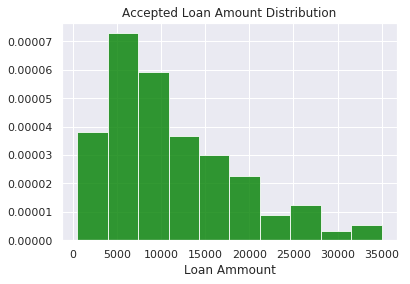

In [10]:
sns.set()
plt.hist(accepted_loans['loan_amnt'], density=True, color='green', alpha = 0.8)
plt.title("Accepted Loan Amount Distribution")
plt.xlabel("Loan Ammount")
plt.show()

In [11]:
accepted_inc = accepted_loans['annual_inc']

In [12]:
accepted_inc = accepted_inc[((accepted_inc - accepted_inc.mean()).abs() < (3 * accepted_inc.std()))]

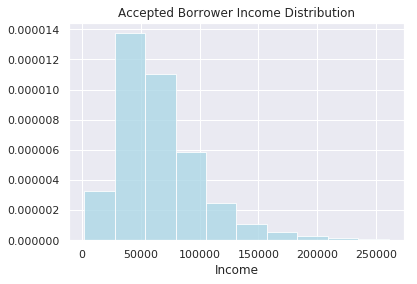

In [13]:
plt.hist(accepted_inc, density=True, alpha=0.8, color = 'lightblue')
plt.title("Accepted Borrower Income Distribution")
plt.xlabel("Income")
plt.show()

In [14]:
int_rate = accepted_loans['int_rate'].dropna()
int_rate = int_rate.apply(lambda x: x.strip("%"))
int_rate = int_rate.astype('float')

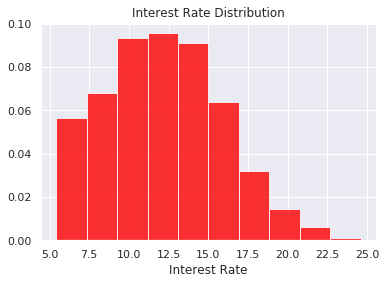

In [15]:
plt.hist(int_rate, density=True, color='red', alpha=0.8)
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate")
plt.show()

In [16]:
accepted_clean = accepted_loans[['loan_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'addr_state', 'home_ownership']].dropna()

In [17]:
accepted_clean['int_rate'] = accepted_clean['int_rate'].apply(lambda x: x.strip('%')).astype('float')

In [18]:
accepted_clean.describe()

,loan_amnt,int_rate,annual_inc
count,42531.000000,42531.000000,4.253100e+04
mean,11090.173050,12.165424,6.913656e+04
std,7411.137529,3.707870,6.409635e+04
min,500.000000,5.420000,1.896000e+03
25%,5200.000000,9.630000,4.000000e+04
50%,9700.000000,11.990000,5.900000e+04
75%,15000.000000,14.720000,8.250000e+04
max,35000.000000,24.590000,6.000000e+06


In [19]:
accepted_clean.head()

,loan_amnt,term,int_rate,grade,annual_inc,addr_state,home_ownership
0,5000.0,36 months,10.65,B,24000.0,AZ,RENT
1,2500.0,60 months,15.27,C,30000.0,GA,RENT
2,2400.0,36 months,15.96,C,12252.0,IL,RENT
3,10000.0,36 months,13.49,C,49200.0,CA,RENT
4,3000.0,60 months,12.69,B,80000.0,OR,RENT


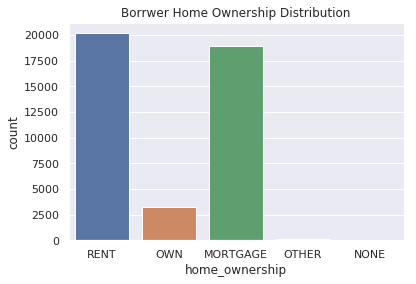

In [20]:
sns.countplot(accepted_clean['home_ownership'])
plt.title('Borrwer Home Ownership Distribution')
plt.show()

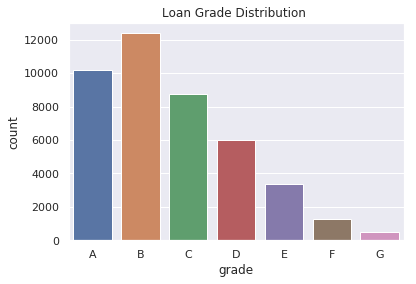

In [21]:
sns.countplot(accepted_clean['grade'], order = ('A', 'B', 'C', 'D', 'E', 'F', 'G'))
plt.title('Loan Grade Distribution ')
plt.show()

In [22]:
grade_interest_rates = accepted_clean.groupby('grade').mean()['int_rate']

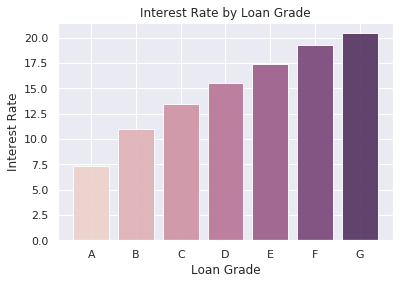

In [23]:
plt.bar(grade_interest_rates.index, grade_interest_rates, color = sns.cubehelix_palette(8), alpha = 0.9)
plt.title("Interest Rate by Loan Grade")
plt.xlabel('Loan Grade')
plt.ylabel("Interest Rate")
plt.show()

In [24]:
home_interest_rates = accepted_clean.groupby('home_ownership').mean()['int_rate']

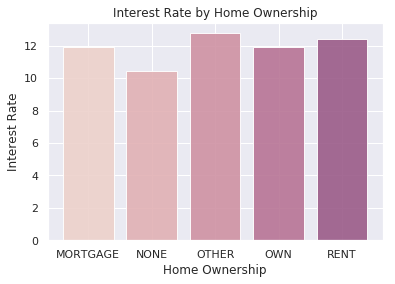

In [25]:
plt.bar(home_interest_rates.index, home_interest_rates, color = sns.cubehelix_palette(8), alpha = 0.9)
plt.title("Interest Rate by Home Ownership")
plt.xlabel('Home Ownership')
plt.ylabel("Interest Rate")
plt.show()

In [26]:
b = np.arange(accepted_clean['annual_inc'].min(), accepted_clean['annual_inc'].max(), step = 5000)

In [27]:
accepted_bin = accepted_clean
accepted_bin['bin'] = pd.cut(accepted_clean['annual_inc'], b)

In [28]:
accepted_bin.head()

,loan_amnt,term,int_rate,grade,annual_inc,addr_state,home_ownership,bin
0,5000.0,36 months,10.65,B,24000.0,AZ,RENT,"(21896.0, 26896.0]"
1,2500.0,60 months,15.27,C,30000.0,GA,RENT,"(26896.0, 31896.0]"
2,2400.0,36 months,15.96,C,12252.0,IL,RENT,"(11896.0, 16896.0]"
3,10000.0,36 months,13.49,C,49200.0,CA,RENT,"(46896.0, 51896.0]"
4,3000.0,60 months,12.69,B,80000.0,OR,RENT,"(76896.0, 81896.0]"


In [29]:
int_by_income = accepted_bin.groupby('bin').mean()['int_rate']

In [30]:
int_by_income = int_by_income.dropna()

In [31]:
pd.IntervalIndex(int_by_income.index).mid

Float64Index([   4396.0,    9396.0,   14396.0,   19396.0,   24396.0,   29396.0,
                34396.0,   39396.0,   44396.0,   49396.0,
              ...
              1079396.0, 1174396.0, 1199396.0, 1249396.0, 1364396.0, 1439396.0,
              1784396.0, 1899396.0, 2039396.0, 3899396.0],
             dtype='float64', length=136)

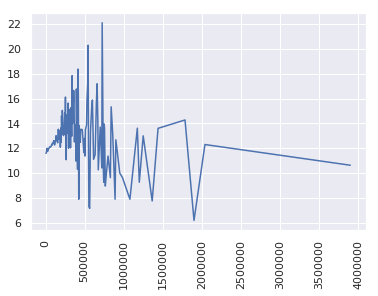

In [32]:
plt.plot(pd.IntervalIndex(int_by_income.index).mid, int_by_income)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
rejected_loans.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


In [34]:
rejected_loans['Debt-To-Income Ratio'] = rejected_loans['Debt-To-Income Ratio'].apply(lambda x: x.strip("%")).astype('float')
rejected_loans = rejected_loans.dropna()

In [35]:
def extractor(x):
    try:
        y = [int(s) for s in x.split() if s.isdigit()][0]
    except:
        y = np.NaN
    return(y)

In [36]:
rejected_loans['Employment Length'] = rejected_loans['Employment Length'].apply(extractor)

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


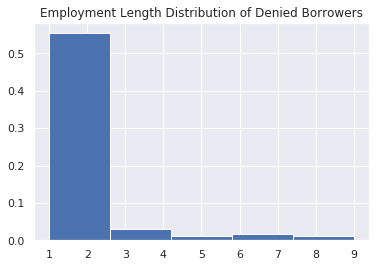

In [37]:
plt.hist(rejected_loans['Employment Length'], density=True, bins = 5)
plt.title('Employment Length Distribution of Denied Borrowers')
plt.show()

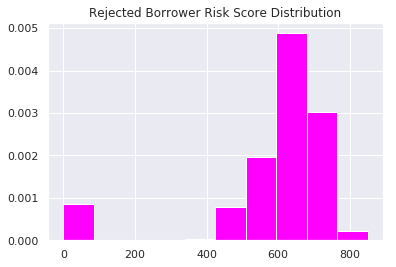

In [38]:
plt.hist(rejected_loans['Risk_Score'], color='magenta', density=True)
plt.title("Rejected Borrower Risk Score Distribution")
plt.show()

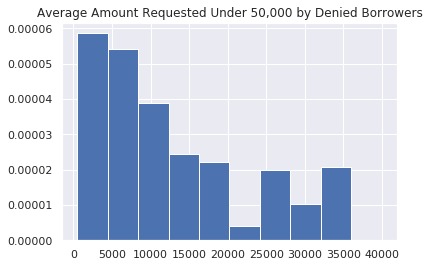

In [39]:
plt.hist(rejected_loans[rejected_loans['Amount Requested'] < 40000]['Amount Requested'], density=True)
plt.title("Average Amount Requested Under 50,000 by Denied Borrowers")
plt.show()

In [40]:
rejected_loans[rejected_loans['Amount Requested'] > 200000]

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
157454,1400000.0,2010-09-10,car,641.0,47.55,295xx,SC,2.0,0
277520,500000.0,2011-06-09,other,593.0,0.11,720xx,AR,1.0,0
281673,500000.0,2011-06-15,other,631.0,0.21,341xx,FL,NaN,0
601815,300000.0,2012-08-22,car,560.0,0.00,770xx,TX,NaN,0
663465,1000000.0,2012-10-16,debt_consolidation,534.0,0.00,173xx,PA,1.0,0
664228,1200000.0,2012-10-16,debt_consolidation,516.0,0.00,917xx,CA,1.0,0


In [41]:
rejected_loans['Amount Requested'].mean()

12952.296133618234